# Assignment 06 - Weather
Programming for Data Analytics, Atlantic Technological University
Autumn 2025  
Author: Susan Collins  

## Brief for this assignment
>Create a notebook called assignment_6_Weather.ipynb
>
>Get the data from this link.
>
>https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv
>
>(This is different that the data I used in the lecture)
>
>Plot:
>  >  The temperature  
>  > The mean temperature each day  
>  >  The mean temperature for each month
> 
> 60% of the marks will be given for the above  
> 
>For the last 40%  
> Plot:
>>     The Windspeed (there is data missing from this column)
>>     The rolling windspeed (say over 24 hours)
>>     The max windspeed for each day
>>     The monthly mean of the daily max windspeeds (yer I am being nasty here)
> 
> You do not need to over comment your code. Marks will be given for how nice the plots are.

## Acquire Data

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
csv_url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"

# From looking at the CSV file, the first 23 rows contain header and 
# meta-information and so should be skipped.

# Specify the columns I am interested in for this assignment
cols = ["date", "temp", "wdsp"]

# read in the csv file, setting the datetime column to be the index.
df = pd.read_csv(csv_url, skiprows=23, usecols=cols, parse_dates=['date'], index_col="date")

# Look at resulting dataframe
df.head()

/var/folders/_s/9c81szls3z91q3yyzsykzzz00000gn/T/ipykernel_43120/4271083930.py:10: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_url, skiprows=23, usecols=cols, parse_dates=['date'], index_col="date")
/var/folders/_s/9c81szls3z91q3yyzsykzzz00000gn/T/ipykernel_43120/4271083930.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(csv_url, skiprows=23, usecols=cols, parse_dates=['date'], index_col="date")


,temp,wdsp
date,,
1996-04-10 14:00:00,11.5,0
1996-07-31 08:00:00,11.5,0
1996-07-31 09:00:00,11.6,0
1996-07-31 10:00:00,12.9,0
1996-07-31 11:00:00,14.5,0


## Part 1: Plot the temperature

In [3]:
# Get mean temperature each day and each month
# ref: https://www.geeksforgeeks.org/python/python-pandas-dataframe-resample/

df_mean_daily = df["temp"].resample("D").mean()
df_mean_monthly = df["temp"].resample("ME").mean()

# drop null values
df_mean_daily.dropna(inplace=True)
df_mean_monthly.dropna(inplace=True)

df_mean_monthly.head()

date
1996-04-30    11.500000
1996-07-31    12.650000
1996-08-31    12.946909
1996-09-30    12.174306
1996-10-31     9.614113
Name: temp, dtype: float64

''

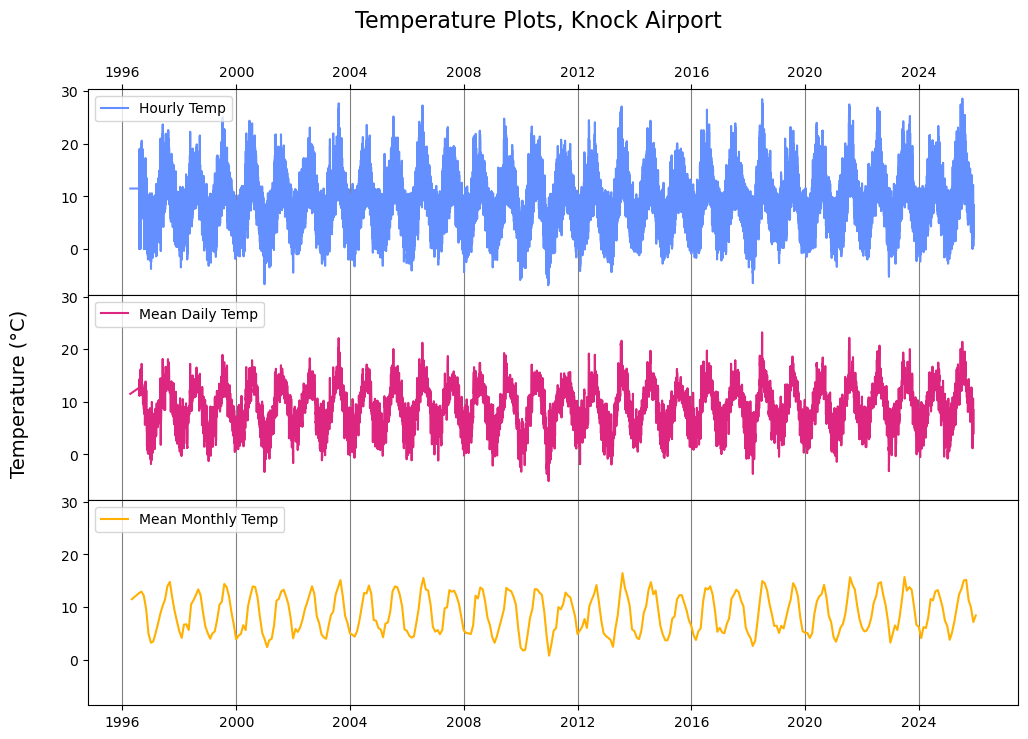

In [4]:
# Set up 3 subplots, no vertical space between them
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8), sharex=True, sharey=True) 
fig.subplots_adjust(hspace=0)

fig.suptitle("Temperature Plots, Knock Airport", fontsize=16)
fig.supylabel("Temperature (°C)", fontsize=14, x=0.06)

ax1.plot(df.index, df["temp"], color="#648FFF", label="Hourly Temp")
ax1.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

ax2.plot(df_mean_daily, color="#DC267F", label="Mean Daily Temp")
ax3.plot(df_mean_monthly, color="#FFB000", label="Mean Monthly Temp")

ax1.grid(axis='x', color="grey")
ax2.grid(axis='x', color="grey")
ax3.grid(axis='x', color="grey")

ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')

;

''

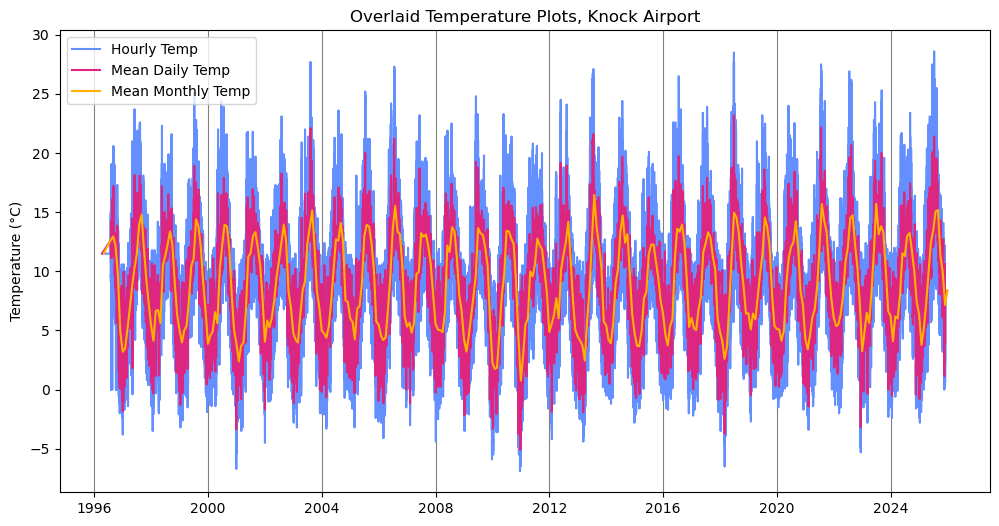

In [5]:
# Overlaid Plots

plt.figure(figsize=(12, 6))
plt.title("Overlaid Temperature Plots, Knock Airport")
plt.ylabel("Temperature (°C)")

plt.plot(df.index, df["temp"], color="#648FFF", label="Hourly Temp")
plt.plot(df_mean_daily, color="#DC267F", label="Mean Daily Temp")
plt.plot(df_mean_monthly, color="#FFB000", label="Mean Monthly Temp")

plt.grid(axis='x', color="grey")

plt.legend(loc='best')

;

## Part 2: Windspeed

### Plotting the windspeed data

In [6]:
# Extract windspeed data to its own dataSeries.
windspeed = df["wdsp"]
print(f"There are {len(windspeed)} values in this windspeed dataSeries.")

# Convert windspeed values to numerals. Any values not convertible will be changed to NaN
windspeed = pd.to_numeric(windspeed, errors='coerce')
print(f"There are {windspeed.isna().sum()} NaN values in this windspeed dataframe.")

#Drop any NaN values
windspeed.dropna(inplace=True)
print(f"After drop: There are {windspeed.isna().sum()} NaN values in this windspeed dataframe.")

There are 257154 values in this windspeed dataSeries.
There are 50 NaN values in this windspeed dataframe.
After drop: There are 0 NaN values in this windspeed dataframe.


''

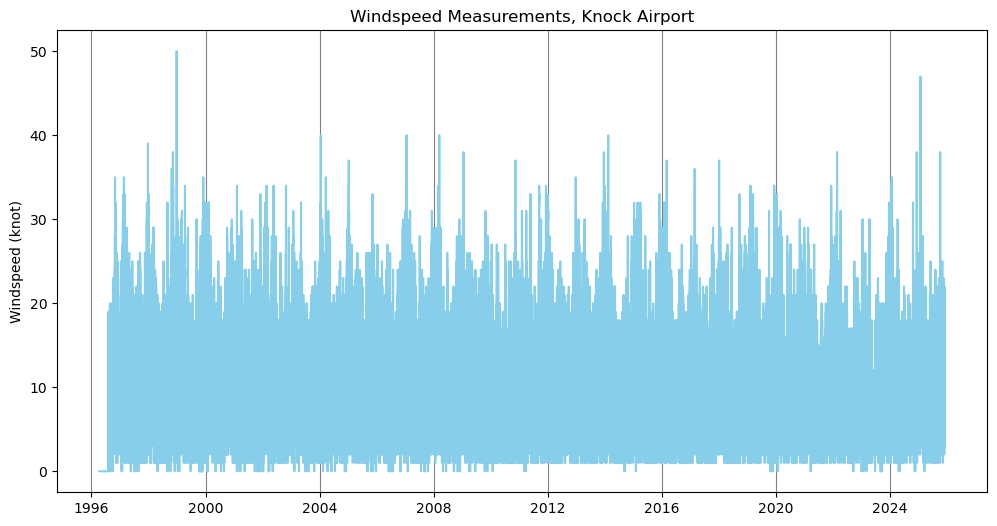

In [7]:
# Plotting the windspeed data
plt.figure(figsize=(12, 6))
plt.title("Windspeed Measurements, Knock Airport")
plt.ylabel("Windspeed (knot)")

plt.plot(windspeed, color="skyblue")

plt.grid(axis='x', color="grey")

;

### Plotting the rolling mean windspeed over a 24-hour interval

In [8]:
# Calculating the rolling mean windspeed over 24-hour interval. The windspeed 
# dataSeries must be converted to a dataFrame to use the rolling method.
windspeed = windspeed.to_frame()

windspeed["24hr_roll_mean"] = windspeed.rolling('24h').mean()

windspeed.head()

,wdsp,24hr_roll_mean
date,,
1996-04-10 14:00:00,0.0,0.0
1996-07-31 08:00:00,0.0,0.0
1996-07-31 09:00:00,0.0,0.0
1996-07-31 10:00:00,0.0,0.0
1996-07-31 11:00:00,0.0,0.0


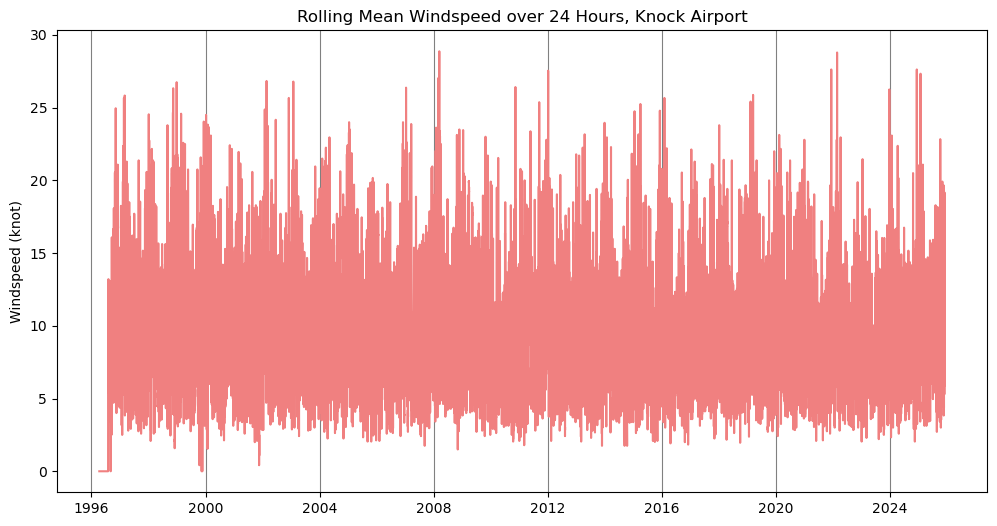

In [9]:
# Plot the rolling mean windspeed over 24-hour interval
plt.figure(figsize=(12, 6))
plt.title("Rolling Mean Windspeed over 24 Hours, Knock Airport")
plt.ylabel("Windspeed (knot)")

plt.plot(windspeed.index, windspeed["24hr_roll_mean"], color="lightcoral")

plt.grid(axis='x', color="grey")


### Plotting the max windspeed per day

In [10]:
# Calculate Max Windspeed for each Calendar Day
windspeed_daily_max = windspeed["wdsp"].resample("D").max()

# Drop NaN entries for days with no readings
windspeed_daily_max.dropna(inplace=True)

windspeed_daily_max.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 10717 entries, 1996-04-10 to 2025-12-01
Series name: wdsp
Non-Null Count  Dtype  
--------------  -----  
10717 non-null  float64
dtypes: float64(1)
memory usage: 167.5 KB


''

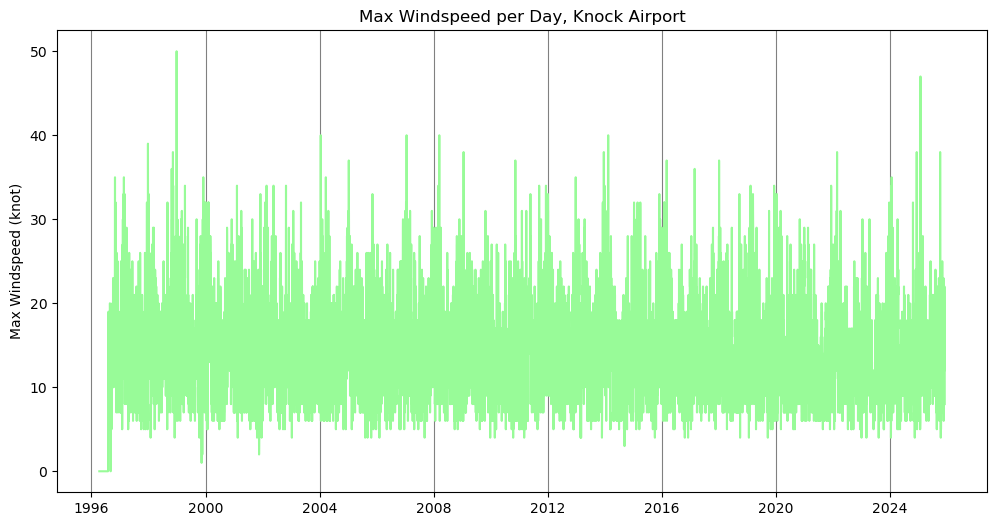

In [11]:
# Plot Max Windspeed for each Calendar Day
plt.figure(figsize=(12, 6))
plt.title("Max Windspeed per Day, Knock Airport")
plt.ylabel("Max Windspeed (knot)")

plt.plot(windspeed_daily_max, color="palegreen")

plt.grid(axis='x', color="grey")
;

### Plotting the monthly mean of the daily max windspeeds

In [12]:
# Calculate monthly mean of the daily max windspeeds 
windspeed_monthly_mean = windspeed_daily_max.resample("ME").mean()

# Drop NaN entries for day with no readings
windspeed_monthly_mean.dropna(inplace=True)

windspeed_monthly_mean

date
1996-04-30     0.000000
1996-07-31     0.000000
1996-08-31    12.516129
1996-09-30    12.266667
1996-10-31    18.193548
                ...    
2025-08-31    13.258065
2025-09-30    15.000000
2025-10-31    15.354839
2025-11-30    15.400000
2025-12-31     8.000000
Name: wdsp, Length: 355, dtype: float64

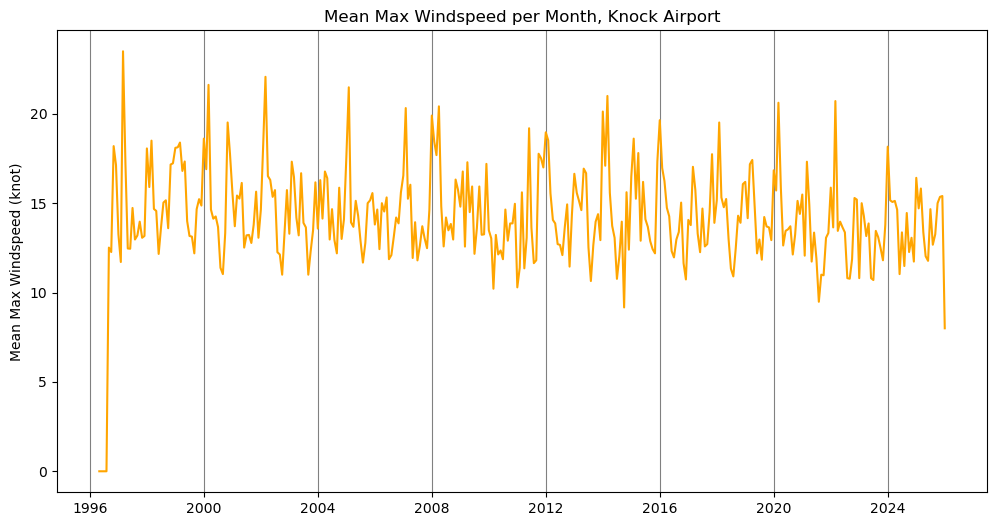

In [13]:
# Plot monthly mean of the daily max windspeeds
plt.figure(figsize=(12, 6))
plt.title("Mean Max Windspeed per Month, Knock Airport")
plt.ylabel("Mean Max Windspeed (knot)")

plt.plot(windspeed_monthly_mean, color="orange")

plt.grid(axis='x', color="grey")

### Plotting all windspeed plots on adjacent subplots, over specified time interval

The above plots can be difficult to read and compare, give the volume of data points.  
We can set a start and end date over which to plot these data, making the 4 data series 
more understandable and easier to compare.

''

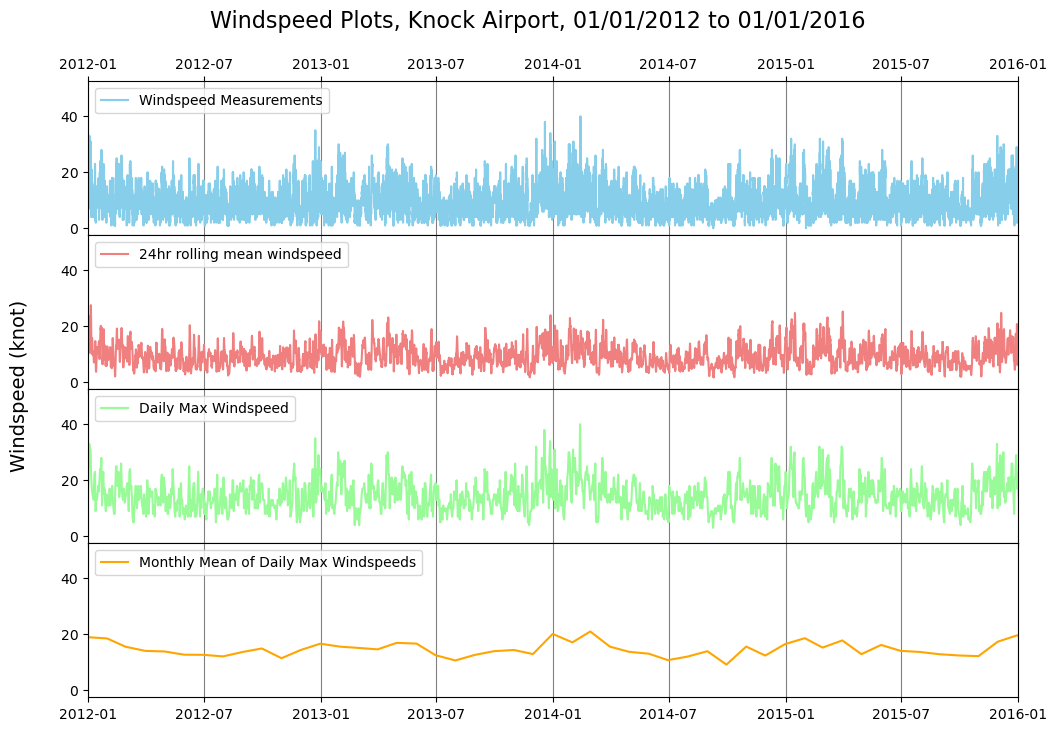

In [14]:
# Set the datetime objects that will control the limits of the plot.
plot_start = dt.date(2012, 1, 1)
plot_end = dt.date(2016, 1, 1)


# Set up 4 subplots, no vertical space between them
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8), sharex=True, sharey=True) 
fig.subplots_adjust(hspace=0)

fig.suptitle(f"Windspeed Plots, Knock Airport, {plot_start.strftime("%d/%m/%Y")} to {plot_end.strftime("%d/%m/%Y")}", fontsize=16, y=0.97)
fig.supylabel("Windspeed (knot)", fontsize=14, x=0.06)

ax1.set_xlim([plot_start, plot_end])

ax1.plot(windspeed.index, windspeed["wdsp"], color="skyblue", label="Windspeed Measurements")
ax1.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

ax2.plot(windspeed.index, windspeed["24hr_roll_mean"], color="lightcoral", label="24hr rolling mean windspeed")

ax3.plot(windspeed_daily_max, color="palegreen", label="Daily Max Windspeed")

ax4.plot(windspeed_monthly_mean, color="orange", label="Monthly Mean of Daily Max Windspeeds")

ax1.grid(axis='x', color="grey")
ax2.grid(axis='x', color="grey")
ax3.grid(axis='x', color="grey")
ax4.grid(axis='x', color="grey")

ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')
ax4.legend(loc='upper left')
;

Using this comparative plot over a shorter time interval, it's easier to see that the 24hr rolling windspeed series follows the raw data but is smoothed; the daily max windspeed series preserves the peaks of the original data, while losing the lower-temperature information; and the monthly mean of daily max windspeeds shows only seasonal variation at this scale.